In [1]:
import cv2
import sys
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from projeto_helper import BeerClassification

PATH = 'C:\\Users\\marco\\Google Drive\\ComputerScience\\Visão Computacional\\images\\Skol'

In [2]:
bc = BeerClassification(PATH, ['0', '1', '2'])
query_img = plt.imread(bc.imgs[0])
train_img = plt.imread(bc.imgs[105])
for i, label in enumerate(bc.labels):
    print(i, label)

0 0_v000_0.jpg
1 0_v000_45L.jpg
2 0_v000_45R.jpg
3 0_v001_0.jpg
4 0_v001_45L.jpg
5 0_v001_45R.jpg
6 0_v002_0.jpg
7 0_v002_45L.jpg
8 0_v002_45R.jpg
9 0_v003_0.jpg
10 0_v003_45L.jpg
11 0_v003_45R.jpg
12 0_v004_0.jpg
13 0_v004_45L.jpg
14 0_v004_45R.jpg
15 0_v005_0.jpg
16 0_v005_45L.jpg
17 0_v005_45R.jpg
18 0_v006_0.jpg
19 0_v006_45L.jpg
20 0_v006_45R.jpg
21 0_v007_0.jpg
22 0_v007_45L.jpg
23 0_v007_45R.jpg
24 0_v008_0.jpg
25 0_v008_45L.jpg
26 0_v008_45R.jpg
27 0_v009_0.jpg
28 0_v009_45L.jpg
29 0_v009_45R.jpg
30 0_v010_0.jpg
31 0_v010_45L.jpg
32 0_v010_45R.jpg
33 0_v011_0.jpg
34 0_v011_45L.jpg
35 0_v011_45R.jpg
36 0_v012_0.jpg
37 0_v012_45L.jpg
38 0_v012_45R.jpg
39 0_v013_0.jpg
40 0_v013_45L.jpg
41 0_v013_45R.jpg
42 0_v014_0.jpg
43 0_v014_45L.jpg
44 0_v014_45R.jpg
45 0_v015_0.jpg
46 0_v015_45L.jpg
47 0_v015_45R.jpg
48 0_v016_0.jpg
49 0_v016_45L.jpg
50 0_v016_45R.jpg
51 0_v017_0.jpg
52 0_v017_45L.jpg
53 0_v017_45R.jpg
54 0_v018_0.jpg
55 0_v018_45L.jpg
56 0_v018_45R.jpg
57 0_v019_0.jpg
58 0_v

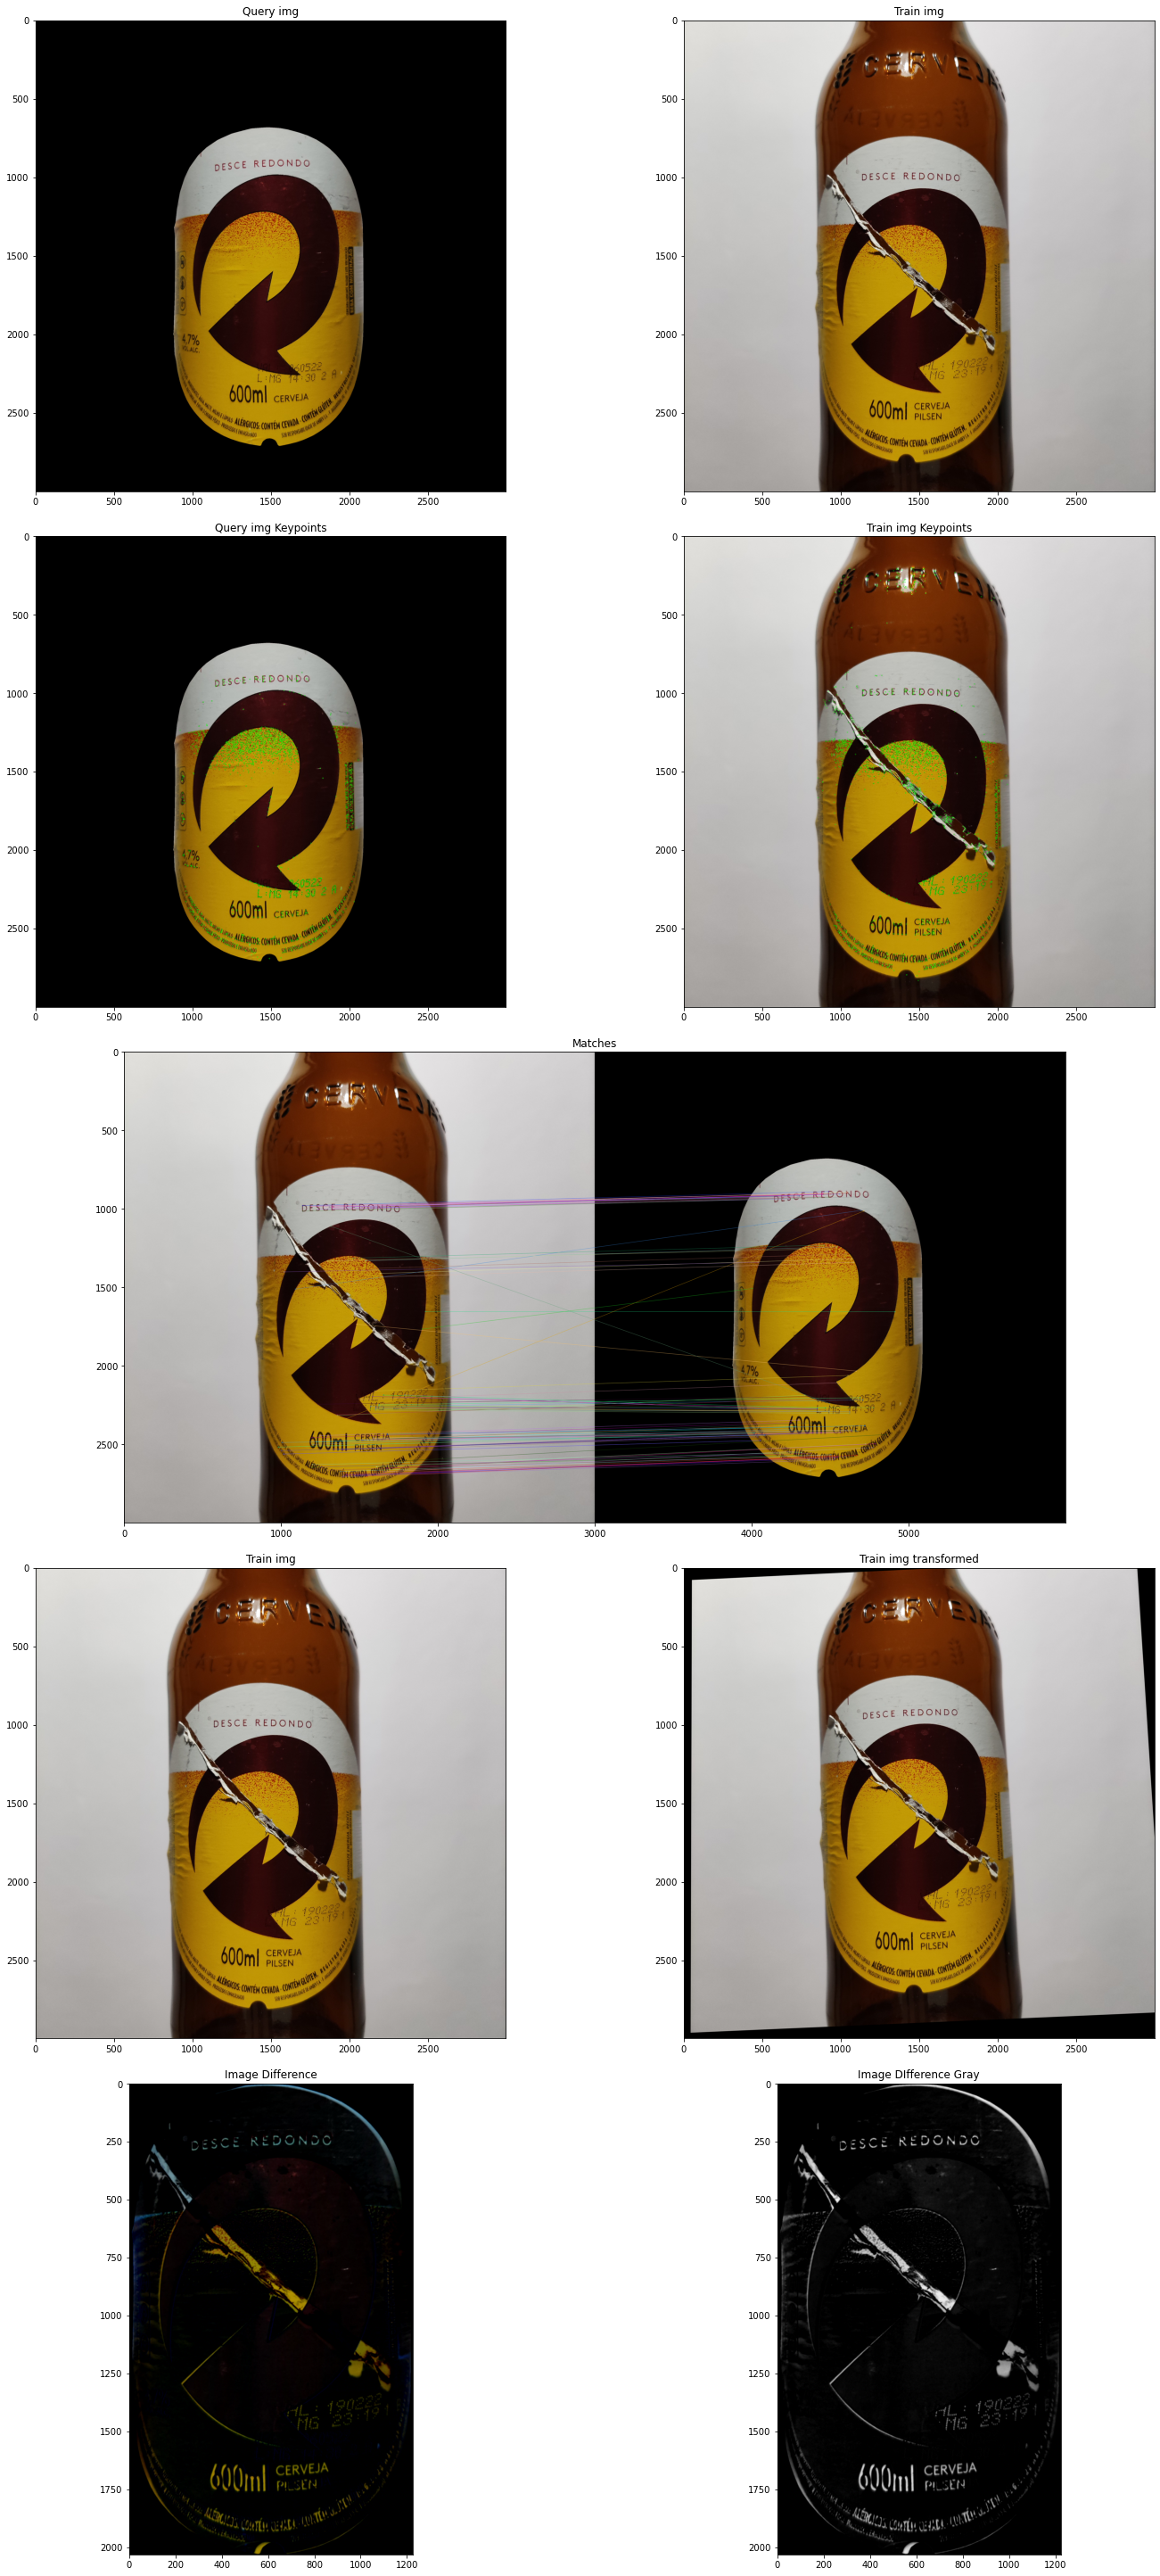

In [3]:
mask = plt.imread(join(PATH, 'mask0.jpg'))
query_img_m = cv2.bitwise_and(query_img, mask)

img_diff = bc.processGetDiff(query_img_m, train_img, plot=True, nfeatures=4000, nOctaveLayers=6, edgeThreshold=4, sigma=2.5)

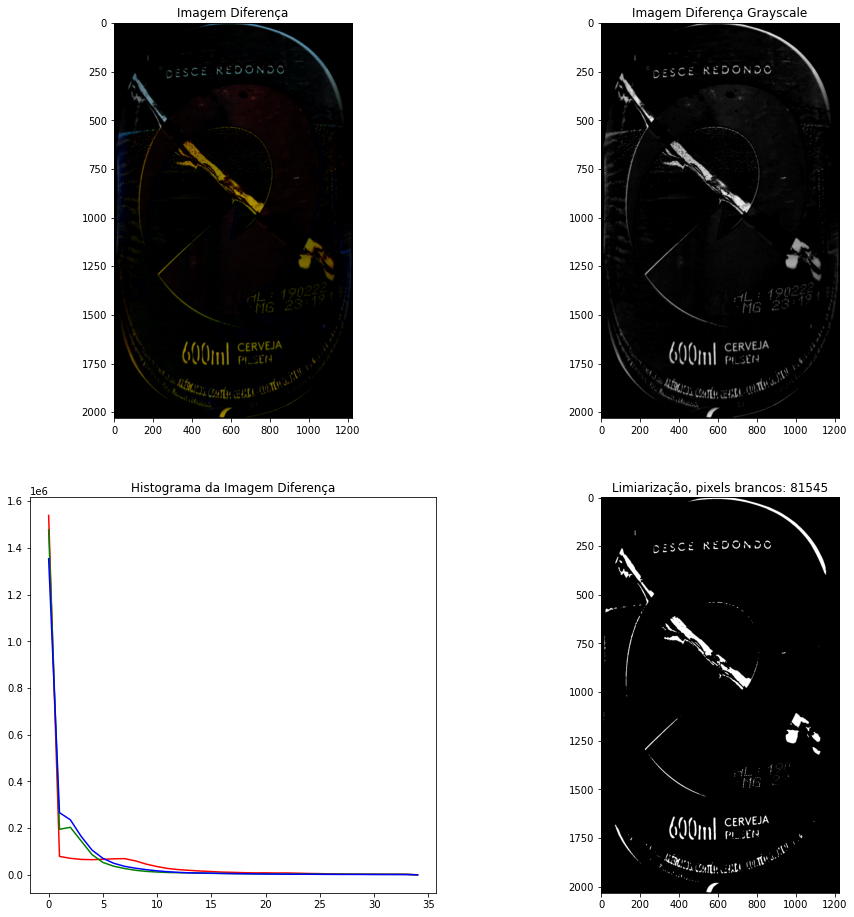

In [4]:
img_diff_gray = cv2.cvtColor(img_diff, cv2.COLOR_RGB2GRAY)
hist = []

fig, axs = plt.subplots(2, 2, figsize=(16, 16))
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    hist.append(cv2.calcHist([img_diff], [i], None, [35], [0, 34]))
    axs[1, 0].plot(hist[i], color=col)

_, img_diff_t = cv2.threshold(img_diff_gray, 50, 1, cv2.THRESH_BINARY)
t_sum = np.sum(img_diff_t)

axs[0, 0].imshow(img_diff)
axs[0, 0].set_title("Imagem Diferença")
axs[0, 1].imshow(img_diff_gray, 'gray')
axs[0, 1].set_title("Imagem Diferença Grayscale")
axs[1, 1].imshow(img_diff_t, 'gray')

axs[1, 1].set_title(f'Limiarização, pixels brancos: {t_sum}')
axs[1, 0].set_title("Histograma da Imagem Diferença")
plt.show()

# Save all img_diff

In [5]:
bc = BeerClassification(PATH, ids=['0', '1', '2'])
count = [0, 0, 0]
for i, label in enumerate(bc.labels):
    ident, _, _ = label.split('_') # [id, version, rot.jpg]
    if ident == '0':
        count[0] += 1
    elif ident == '1':
        count[1] += 1
    elif ident == '2':
        count[2] += 1
print('Antes do balanceamento:', count)

Antes do balanceamento: [105, 105, 105]


In [6]:
# m = min(count)
# idx = 0
# new_labels = []
# new_imgs = []
# for i in count:
#     new_labels.extend(bc.labels[idx : idx + m])
#     new_imgs.extend(bc.imgs[idx : idx + m])
#     print(idx, m + idx)
#     idx += i
# bc.labels = new_labels
# bc.imgs = new_imgs
    
# count = [0, 0, 0]
# for i, label in enumerate(bc.labels):
#     ident, _, _ = label.split('_') # [id, version, rot.jpg]
#     if ident == '0':
#         count[0] += 1
#     elif ident == '1':
#         count[1] += 1
#     elif ident == '2':
#         count[2] += 1
# print('Após o balanceamento:', count)

In [7]:
query_idx = 0
train_idx = 0
for i, label in enumerate(bc.labels):
    ident, version, rot = label.split('_') #[id, version, rot.jpg]
    rot = rot.split('.')[0]
    if ident == '0' and rot == '0':
        if version == 'v000':
            query_idx = i
        elif version == 'v001':
            train_idx = i
if query_idx == train_idx:
    sys.exit(f"Error, idxs not found {query_idx} - {train_idx}")
query_img_0 = plt.imread(bc.imgs[query_idx])

query_img_45L = plt.imread(bc.imgs[query_idx + 1])
query_img_45R = plt.imread(bc.imgs[query_idx + 2])

mask_0 = plt.imread(join(PATH, 'mask0.jpg'))
mask_45L = plt.imread(join(PATH, 'mask45L.jpg'))
mask_45R = plt.imread(join(PATH, 'mask45R.jpg'))

query_img_0_m = cv2.bitwise_and(query_img_0, mask_0)
query_img_45L_m = cv2.bitwise_and(query_img_45L, mask_45L)
query_img_45R_m = cv2.bitwise_and(query_img_45R, mask_45R)

In [8]:
# # imgs_diff2 uses default SIFT parameters
# # imgs_diff uses custom SIFT parameters, check cells below
# query_imgs = [query_img_0_m, query_img_45L_m, query_img_45R_m]
# query_idxs = [query_idx, query_idx + 1, query_idx + 2]
# bc.processGetDiffAllImages(query_imgs, query_idxs, folder_path='temp')

# Analise de Histograma Resultados

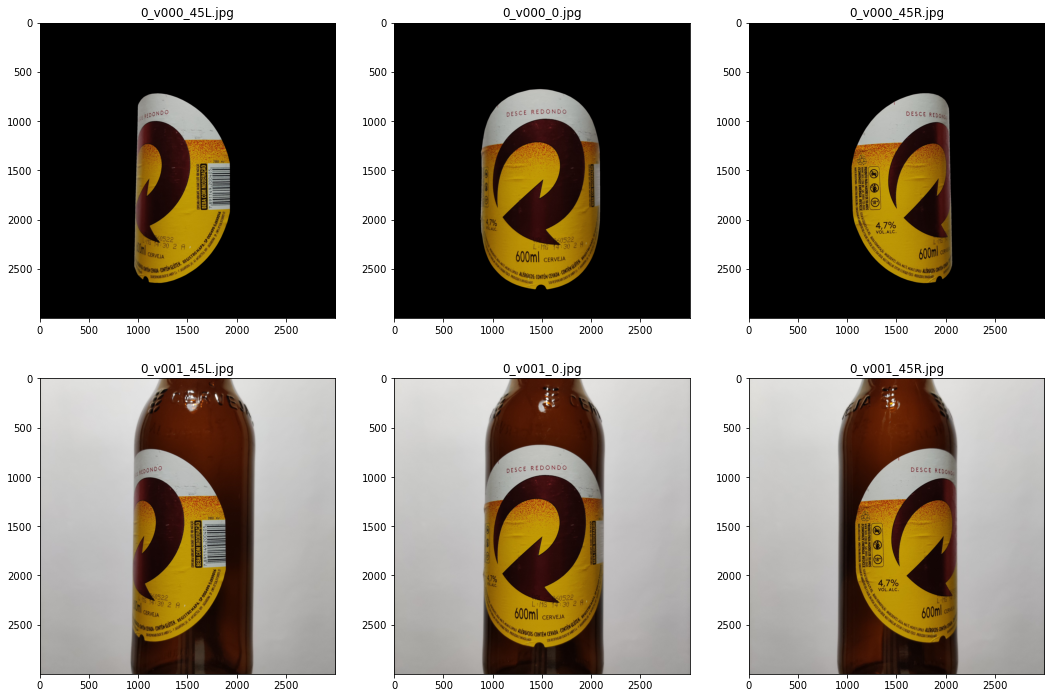

In [9]:
train_img_0 = plt.imread(bc.imgs[train_idx])
train_img_45L = plt.imread(bc.imgs[train_idx + 1])
train_img_45R = plt.imread(bc.imgs[train_idx + 2])

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(query_img_45L_m)
axs[0, 0].set_title(bc.labels[query_idx + 1])
axs[0, 1].imshow(query_img_0_m)
axs[0, 1].set_title(bc.labels[query_idx])
axs[0, 2].imshow(query_img_45R_m)
axs[0, 2].set_title(bc.labels[query_idx + 2])
axs[1, 0].imshow(train_img_45L)
axs[1, 0].set_title(bc.labels[train_idx + 1])
axs[1, 1].imshow(train_img_0)
axs[1, 1].set_title(bc.labels[train_idx])
axs[1, 2].imshow(train_img_45R)
axs[1, 2].set_title(bc.labels[train_idx + 2])
plt.show()

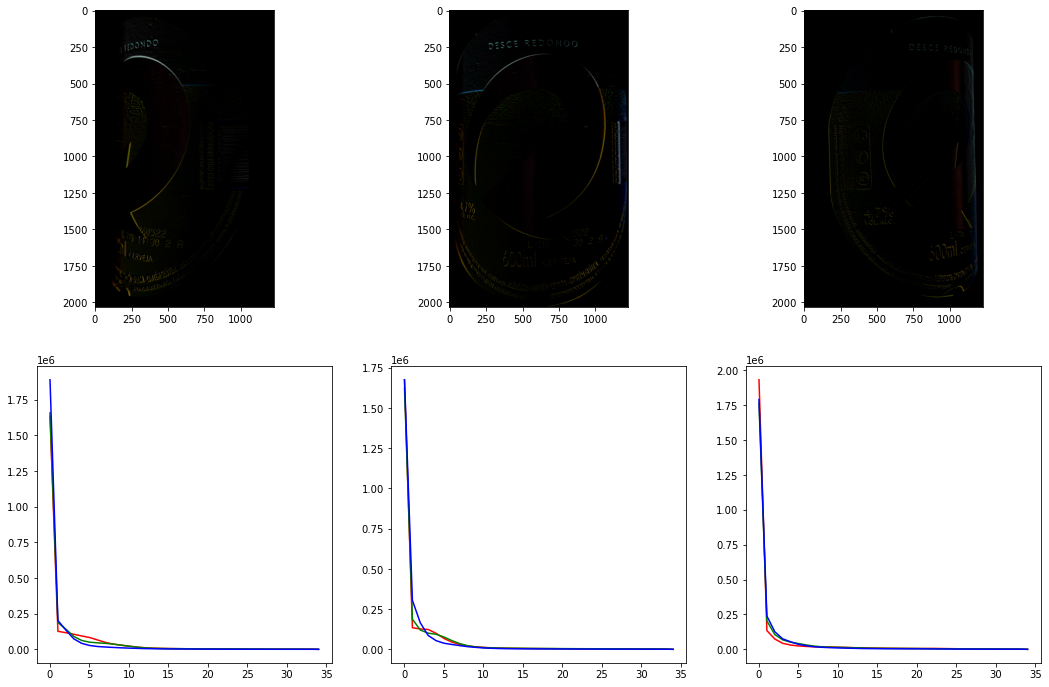

Acc 45L: 0.5961538461538461
Acc 0:   0.5288461538461539
Acc 45R: 0.5288461538461539


In [10]:
img_diff_0 = bc.processGetDiff(query_img_0_m, train_img_0, nfeatures=4000, nOctaveLayers=6, edgeThreshold=4, sigma=2.5)
img_diff_45L = bc.processGetDiff(query_img_45L_m, train_img_45L, nfeatures=4000, nOctaveLayers=6, edgeThreshold=4, sigma=2.5)
img_diff_45R = bc.processGetDiff(query_img_45R_m, train_img_45R, nfeatures=4000, nOctaveLayers=6, edgeThreshold=4, sigma=2.5)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(img_diff_45L)
axs[0, 1].imshow(img_diff_0)
axs[0, 2].imshow(img_diff_45R)

hist_size = [35]
ranges = [0, 34]
color = ('r', 'g', 'b')
hist_0 = []
hist_45L = []
hist_45R = []
for i, col in enumerate(color):
    hist_0.append(cv2.calcHist([img_diff_0], [i], None, hist_size, ranges))
    hist_45L.append(cv2.calcHist([img_diff_45L], [i], None, hist_size, ranges))
    hist_45R.append(cv2.calcHist([img_diff_45R], [i], None, hist_size, ranges))
    
    axs[1, 0].plot(hist_45L[i], color=col)
    axs[1, 1].plot(hist_0[i], color=col)
    axs[1, 2].plot(hist_45R[i], color=col)
plt.show()

results_0 = bc.compareHistogramAllImages(hist_0, 'imgs_diff', '0', hist_size, ranges)
results_45L = bc.compareHistogramAllImages(hist_45L, 'imgs_diff', '45L', hist_size, ranges)
results_45R = bc.compareHistogramAllImages(hist_45R, 'imgs_diff', '45R', hist_size, ranges)

acc_0 = bc.predictAndScoreSVM(results_0)
acc_45L = bc.predictAndScoreSVM(results_45L)
acc_45R = bc.predictAndScoreSVM(results_45R)

print('Acc 45L:', acc_45L)
print('Acc 0:  ', acc_0)
print('Acc 45R:', acc_45R)

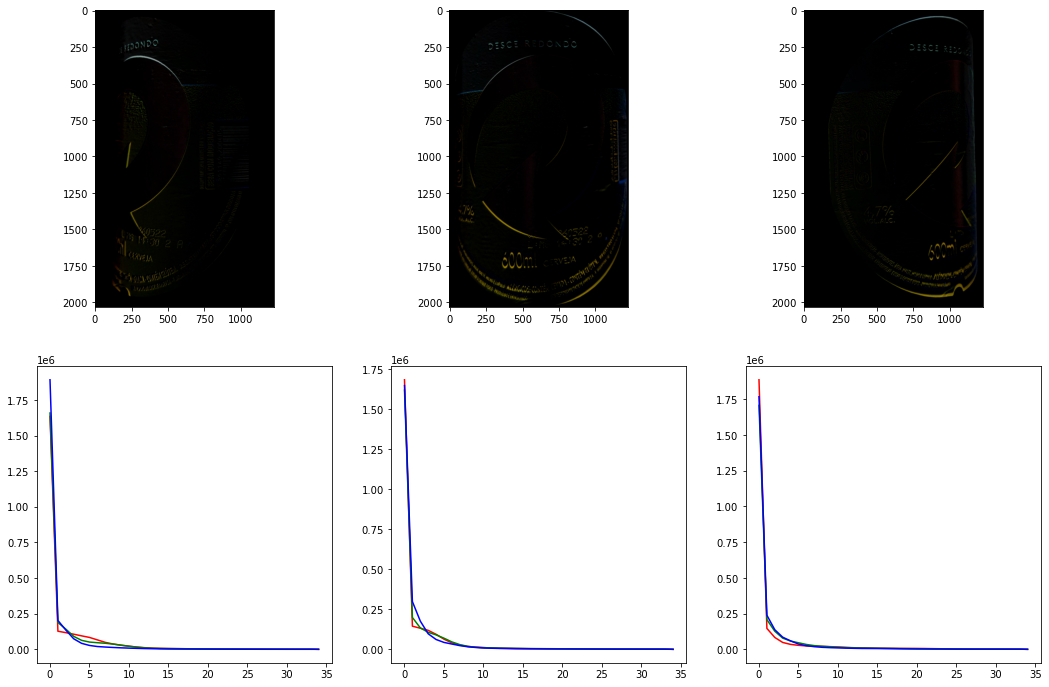

Acc 45L: 0.5769230769230769
Acc 0:   0.5288461538461539
Acc 45R: 0.5576923076923077


In [11]:
img_diff_0 = bc.processGetDiff(query_img_0_m, train_img_0)
img_diff_45L = bc.processGetDiff(query_img_45L_m, train_img_45L)
img_diff_45R = bc.processGetDiff(query_img_45R_m, train_img_45R)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(img_diff_45L)
axs[0, 1].imshow(img_diff_0)
axs[0, 2].imshow(img_diff_45R)

hist_size = [35]
ranges = [0, 34]
color = ('r', 'g', 'b')
hist_0 = []
hist_45L = []
hist_45R = []
for i, col in enumerate(color):
    hist_0.append(cv2.calcHist([img_diff_0], [i], None, hist_size, ranges))
    hist_45L.append(cv2.calcHist([img_diff_45L], [i], None, hist_size, ranges))
    hist_45R.append(cv2.calcHist([img_diff_45R], [i], None, hist_size, ranges))
    
    axs[1, 0].plot(hist_45L[i], color=col)
    axs[1, 1].plot(hist_0[i], color=col)
    axs[1, 2].plot(hist_45R[i], color=col)
plt.show()

results_0 = bc.compareHistogramAllImages(hist_0, 'imgs_diff2', '0', hist_size, ranges)
results_45L = bc.compareHistogramAllImages(hist_45L, 'imgs_diff2', '45L', hist_size, ranges)
results_45R = bc.compareHistogramAllImages(hist_45R, 'imgs_diff2', '45R', hist_size, ranges)

acc_0 = bc.predictAndScoreSVM(results_0)
acc_45L = bc.predictAndScoreSVM(results_45L)
acc_45R = bc.predictAndScoreSVM(results_45R)

print('Acc 45L:', acc_45L)
print('Acc 0:  ', acc_0)
print('Acc 45R:', acc_45R)

# Limiarizacao

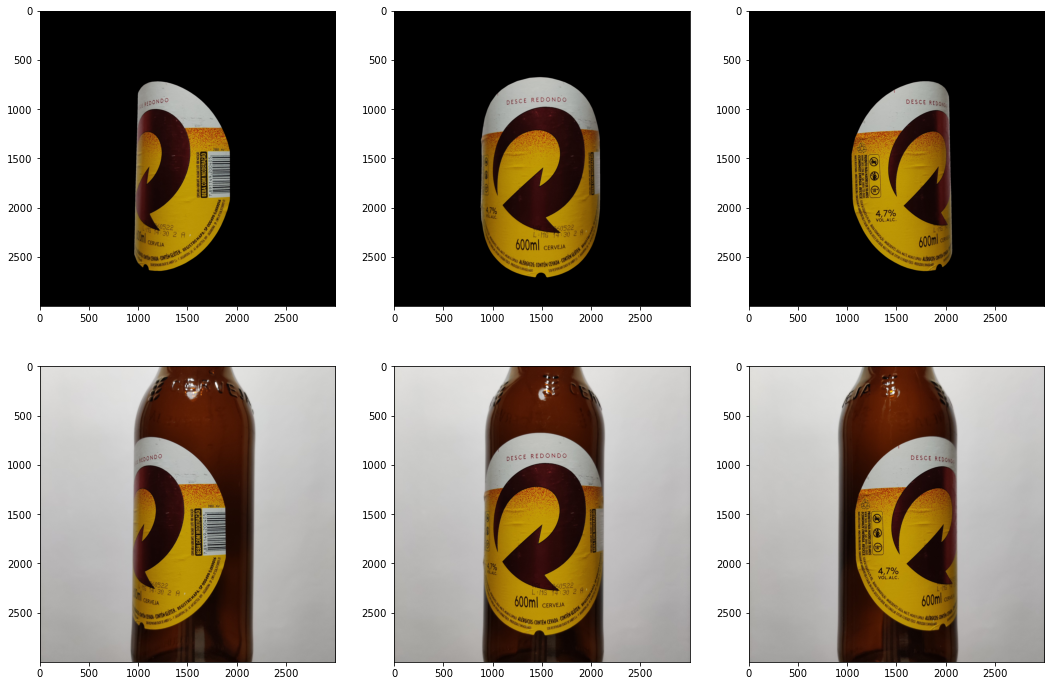

In [12]:
train_img_0 = plt.imread(bc.imgs[3])
train_img_45L = plt.imread(bc.imgs[4])
train_img_45R = plt.imread(bc.imgs[5])

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(query_img_45L_m)
axs[0, 1].imshow(query_img_0_m)
axs[0, 2].imshow(query_img_45R_m)
axs[1, 0].imshow(train_img_45L)
axs[1, 1].imshow(train_img_0)
axs[1, 2].imshow(train_img_45R)
plt.show()

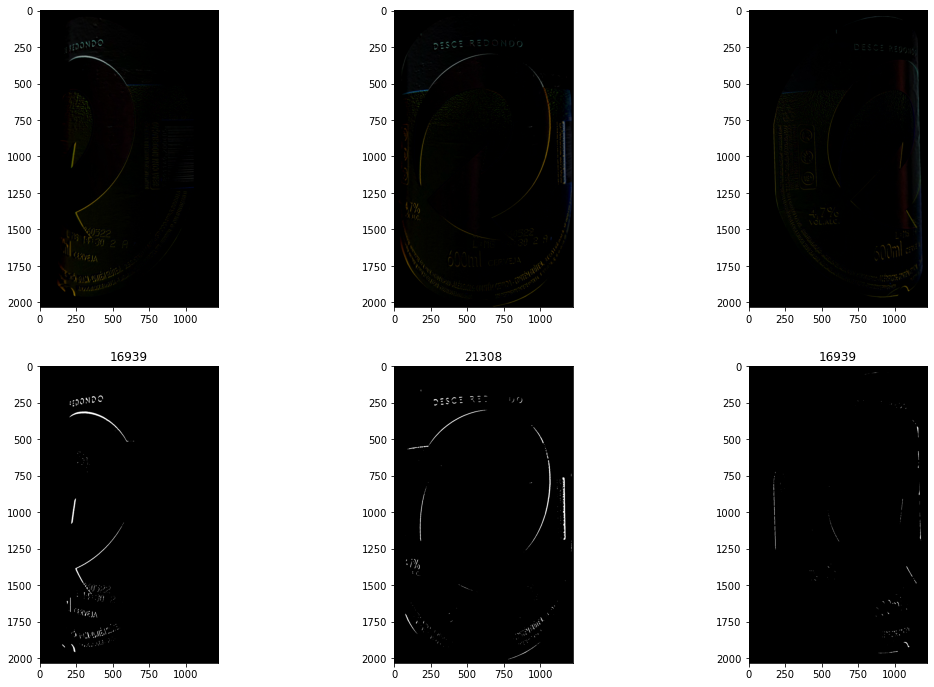

Acc 45L: 0.9166666666666666 T: 24462
Acc 0:   0.9166666666666666 T: 25467
Acc 45R: 0.6428571428571429 T: 36244


In [13]:
img_diff_0 = bc.processGetDiff(query_img_0_m, train_img_0, nfeatures=4000, nOctaveLayers=6, edgeThreshold=4, sigma=2.5)
img_diff_45L = bc.processGetDiff(query_img_45L_m, train_img_45L, nfeatures=4000, nOctaveLayers=6, edgeThreshold=4, sigma=2.5)
img_diff_45R = bc.processGetDiff(query_img_45R_m, train_img_45R, nfeatures=4000, nOctaveLayers=6, edgeThreshold=4, sigma=2.5)

img_diff_0_gray = cv2.cvtColor(img_diff_0, cv2.COLOR_RGB2GRAY)
img_diff_45L_gray = cv2.cvtColor(img_diff_45L, cv2.COLOR_RGB2GRAY)
img_diff_45R_gray = cv2.cvtColor(img_diff_45R, cv2.COLOR_RGB2GRAY)

threshold_value = 50
_, img_diff_0_t = cv2.threshold(img_diff_0_gray, threshold_value, 1, cv2.THRESH_BINARY)
_, img_diff_45L_t = cv2.threshold(img_diff_45L_gray, threshold_value, 1, cv2.THRESH_BINARY)
_, img_diff_45R_t = cv2.threshold(img_diff_45R_gray, threshold_value, 1, cv2.THRESH_BINARY)

sum_0 = np.sum(img_diff_0_t)
sum_45L = np.sum(img_diff_45L_t)
sum_45R = np.sum(img_diff_45R_t)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(img_diff_45L)
axs[0, 1].imshow(img_diff_0)
axs[0, 2].imshow(img_diff_45R)
axs[1, 0].imshow(img_diff_45L_t, 'gray')
axs[1, 1].imshow(img_diff_0_t, 'gray')
axs[1, 2].imshow(img_diff_45R_t, 'gray')
axs[1, 0].set_title(sum_45L)
axs[1, 1].set_title(sum_0)
axs[1, 2].set_title(sum_45L)
plt.show()

results_0 = bc.thresholdAllImages('imgs_diff', desired_rot='0')
results_45L = bc.thresholdAllImages('imgs_diff', desired_rot='45L')
results_45R = bc.thresholdAllImages('imgs_diff', desired_rot='45R')

acc_0, T_0 = bc.predictAndScoreThreshold(results_0)
acc_45L, T_45L = bc.predictAndScoreThreshold(results_45L)
acc_45R, T_45R = bc.predictAndScoreThreshold(results_45R)

print('Acc 45L:', acc_45L, 'T:', T_45L)
print('Acc 0:  ', acc_0, 'T:', T_0)
print('Acc 45R:', acc_45R, 'T:', T_45R)

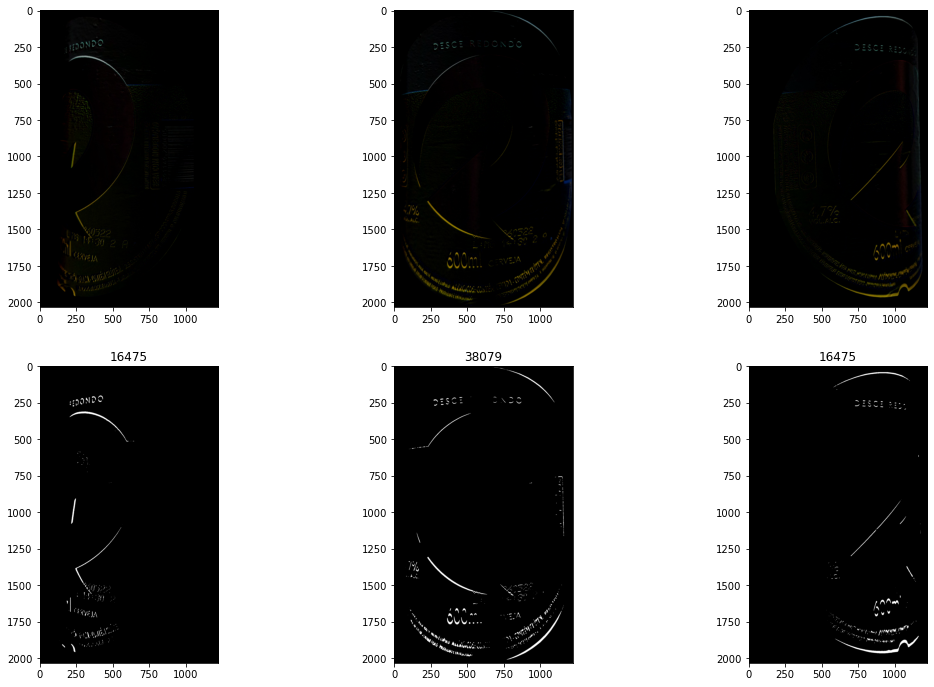

Acc 45L: 0.8571428571428571 T: 24645
Acc 0:   0.7261904761904762 T: 38284
Acc 45R: 0.6547619047619048 T: 31156


In [14]:
img_diff_0 = bc.processGetDiff(query_img_0_m, train_img_0)
img_diff_45L = bc.processGetDiff(query_img_45L_m, train_img_45L)
img_diff_45R = bc.processGetDiff(query_img_45R_m, train_img_45R)

img_diff_0_gray = cv2.cvtColor(img_diff_0, cv2.COLOR_RGB2GRAY)
img_diff_45L_gray = cv2.cvtColor(img_diff_45L, cv2.COLOR_RGB2GRAY)
img_diff_45R_gray = cv2.cvtColor(img_diff_45R, cv2.COLOR_RGB2GRAY)

threshold_value = 50
_, img_diff_0_t = cv2.threshold(img_diff_0_gray, threshold_value, 1, cv2.THRESH_BINARY)
_, img_diff_45L_t = cv2.threshold(img_diff_45L_gray, threshold_value, 1, cv2.THRESH_BINARY)
_, img_diff_45R_t = cv2.threshold(img_diff_45R_gray, threshold_value, 1, cv2.THRESH_BINARY)

sum_0 = np.sum(img_diff_0_t)
sum_45L = np.sum(img_diff_45L_t)
sum_45R = np.sum(img_diff_45R_t)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs[0, 0].imshow(img_diff_45L)
axs[0, 1].imshow(img_diff_0)
axs[0, 2].imshow(img_diff_45R)
axs[1, 0].imshow(img_diff_45L_t, 'gray')
axs[1, 1].imshow(img_diff_0_t, 'gray')
axs[1, 2].imshow(img_diff_45R_t, 'gray')
axs[1, 0].set_title(sum_45L)
axs[1, 1].set_title(sum_0)
axs[1, 2].set_title(sum_45L)
plt.show()

results_0 = bc.thresholdAllImages('imgs_diff2', desired_rot='0')
results_45L = bc.thresholdAllImages('imgs_diff2', desired_rot='45L')
results_45R = bc.thresholdAllImages('imgs_diff2', desired_rot='45R')

acc_0, T_0 = bc.predictAndScoreThreshold(results_0)
acc_45L, T_45L = bc.predictAndScoreThreshold(results_45L)
acc_45R, T_45R = bc.predictAndScoreThreshold(results_45R)

print('Acc 45L:', acc_45L, 'T:', T_45L)
print('Acc 0:  ', acc_0, 'T:', T_0)
print('Acc 45R:', acc_45R, 'T:', T_45R)